In [5]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.facecolor']='white'
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.edgecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.edgecolor']='white'
plt.rcParams['axes.labelsize']=13
plt.rcParams['xtick.labelsize']=13
plt.rcParams['ytick.labelsize']=13
plt.rcParams['axes.titlesize']=13
plt.rcParams['legend.framealpha']=1
plt.rcParams['legend.fontsize']=13
plt.rcParams['axes.xmargin']=0
plt.rcParams['axes.ymargin']=0
plt.rcParams['axes.autolimit_mode']='round_numbers'
matplotlib.rcParams['pdf.fonttype']=42
matplotlib.rcParams['ps.fonttype']=42


def pltcolor(n):
    return plt.rcParams['axes.prop_cycle'].by_key()['color'][n]

In [6]:
g_list = [0.1, 0.0, -0.1]

In [7]:
import itertools
comb_list = []
for v in itertools.product(g_list, repeat=2):
    comb_list += [v]
comb_list

[(0.1, 0.1),
 (0.1, 0.0),
 (0.1, -0.1),
 (0.0, 0.1),
 (0.0, 0.0),
 (0.0, -0.1),
 (-0.1, 0.1),
 (-0.1, 0.0),
 (-0.1, -0.1)]

In [8]:
N_classes = 5
N_nodes = 10
in_round = 10000

In [9]:
markers = ['s','|','o','x','^']

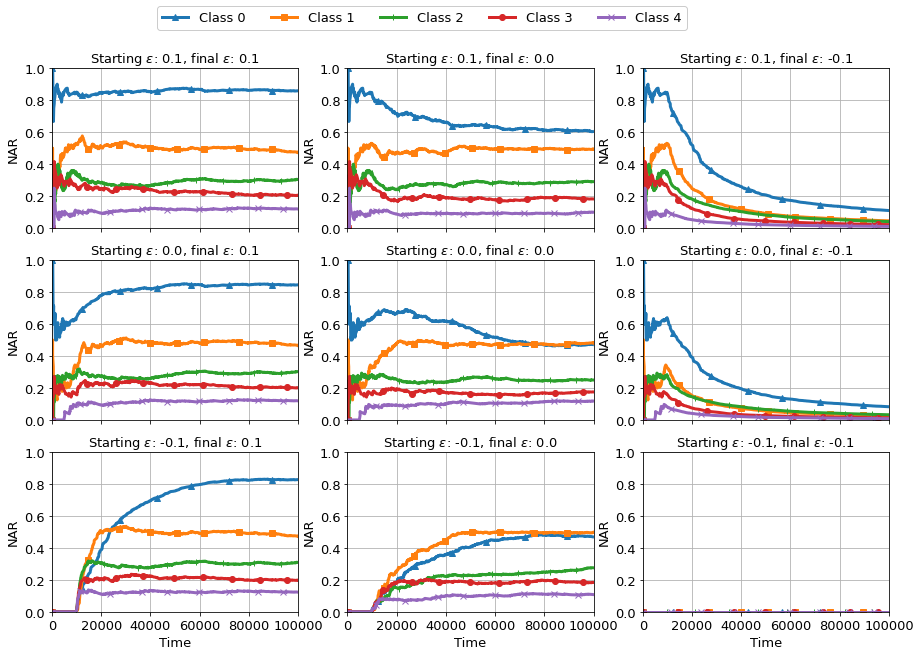

In [10]:
fig, axs = plt.subplots(3, 3, figsize=(15,10))
c = 0
for i in range(3):
    for j in range(3):

        comb = comb_list[c]

        df = pd.read_csv(f"NAR/one_node/in_round_{in_round}/inG_{comb[0]}_fG_{comb[1]}/node_1.csv")

        for cls in range(0,N_classes):
            df_ = df[df["class"] == cls]
            axs[i,j].plot(df_['round'],df_['made_accepted']/df_['made'], marker=markers[cls-1], markevery=100,label=f"Class {cls}")
        # plt.legend()

        axs[i,j].set_ylabel("NAR")
        axs[i,j].set_ylim(0,1)
        axs[i,j].set_xlim(0,100000)

        # plt.legend(ncol=1,labelspacing=0.2)#loc="lower left", bbox_to_anchor=(0.74, 0.48))
        # plt.savefig(f"figures/eps_inG_{comb[0]}_fG_{comb[1]}.png",bbox_inches="tight")
        axs[i,j].set_title(fr"Starting $\epsilon$: {comb[0]}, final $\epsilon$: {comb[1]}")
        c += 1
        if i != 2:
            axs[i,j].axes.xaxis.set_ticklabels([])

        if i == 2:
            axs[i,j].set_xlabel("Time")

        axs[i,j].grid()


plt.legend(ncol=5, loc="lower left", bbox_to_anchor=(-2, 3.6))#,labelspacing=0.2)#loc="lower left", bbox_to_anchor=(0.74, 0.48))
plt.savefig(f"figures/final_inround_{in_round}.pdf",bbox_inches="tight")

plt.show()

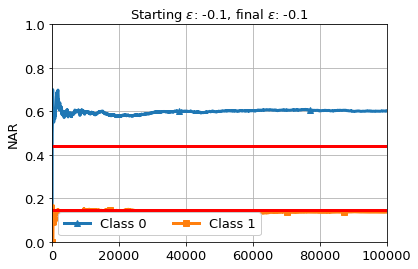

In [12]:
N_classes = 2
c = 0
tau = [0.44,0.147]

df = pd.read_csv(f"NAR/multiple_nodes/node_3_0.01.csv")

for cls in range(0,N_classes):
    df_ = df[df["class"] == cls]
    plt.plot(df_['round'],df_['made_accepted']/df_['made'], marker=markers[cls-1], markevery=1000,label=f"Class {cls}")
# plt.legend()

plt.ylabel("NAR")
plt.ylim(0,1)
plt.xlim(0,100000)

plt.title(fr"Starting $\epsilon$: {comb[0]}, final $\epsilon$: {comb[1]}")

plt.grid()
plt.hlines(xmin=0,xmax=100000,y=tau[0], color="red")
plt.hlines(xmin=0,xmax=100000,y=tau[1], color="red")

plt.legend(ncol=5, loc="lower left")# bbox_to_anchor=(-2, 3.6))#,labelspacing=0.2)#loc="lower left", bbox_to_anchor=(0.74, 0.48))
# plt.savefig(f"figures/final_inround_{in_round}.pdf",bbox_inches="tight")

plt.show()

In [28]:
for i in range(12):
    N_classes = 2
    c = 0
    tau = [0.44,0.147]

    df = pd.read_csv(f"NAR/multiple_nodes/df_all_node_{i}_{0.01}.csv")
    received = df[df.type == "received"]
    received_accepted = received[received.accepted == True]


    made = df[df.type == "made"]
    made_accepted = made[made.accepted == True]

    print((len(made_accepted)+len(received_accepted))/100000)


df

0.05049
0.05001
0.05041
0.05079
0.0502
0.05075
0.03447
0.03436
0.03389
0.03462
0.03437
0.03471


,Unnamed: 0,round,node,session_class,type,accepted
0,0,0,11,1,received,True
1,1,8,11,1,made,False
2,2,10,11,1,made,True
3,3,16,11,1,received,False
4,4,18,11,1,received,False
...,...,...,...,...,...,...
20767,20767,99966,11,1,received,False
20768,20768,99967,11,1,received,False
20769,20769,99968,11,1,received,False
20770,20770,99984,11,1,received,True


In [25]:
received = df[df.type == "received"]
received_accepted = received[received.accepted == True]


made = df[df.type == "made"]
made_accepted = made[made.accepted == True]
made_accepted

,Unnamed: 0,round,node,session_class,type,accepted
2,2,10,11,1,made,True
13,13,66,11,1,made,True
16,16,80,11,1,made,True
36,36,180,11,1,made,True
39,39,198,11,1,made,True
...,...,...,...,...,...,...
20676,20676,99582,11,1,made,True
20688,20688,99685,11,1,made,True
20698,20698,99716,11,1,made,True
20720,20720,99797,11,1,made,True


In [26]:
(len(made_accepted)+len(received_accepted))/100000

0.03471